In [8]:
# 必要なライブラリを読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import csv

In [2]:
# データをインポート
data = pd.read_csv('train.csv')


In [20]:
#balanceの外れ値を除く
def balance_out(df_out):
    
    for i in range(len(df_out)):

        if df_out.loc[i,"balance"] > 100000 :
            df_out=df_out.drop(i, axis=0)
    return df_out

In [21]:
df_dum_out_balance=balance_out(df_out)


In [22]:
#ファイルに保存
# file=df_dum_out_balance
# file.to_csv("df_dum_out_balance")

In [24]:
#previousの外れ値を除く関数
def prev_out(df_out,dfname):
    for i in range(len(df_out)):
        if df_out.loc[i,"previous"] > 200:
            df_out=df_out.drop(i, axis=0)
    file=df_out
    file.to_csv(dfname)
    
    return df_out

In [3]:
prev_out(df_out,"df_dum_out_prev")

In [30]:
#durationの外れ値を除く関数
def duration_out(df_out,dfname):
    for i in range(len(df_out)):
        if df_out.loc[i,"duration"] > 4000:
            df_out=df_out.drop(i, axis=0)
    file=df_out
    file.to_csv(dfname)
    
    return df_out


In [4]:
duration_out(df_out,"df_dum_out_dulation")

In [59]:
#pdaysのグループ分けをする関数
def chan_pday(data,df_name):
    pdays0=[]
    pdays1=[]
    pdays2=[]
    pdays3=[]
    
    for i in range(len(data)):
        if data.loc[i,"pdays"] < 0:
            pdays0.append(1)
            pdays1.append(0)
            pdays2.append(0)
            pdays3.append(0)
        if data.loc[i,"pdays"] >=0 and data.loc[i,"pdays"] < 200:
            pdays0.append(0)
            pdays1.append(1)
            pdays2.append(0)
            pdays3.append(0)
        if data.loc[i,"pdays"] >=200 and data.loc[i,"pdays"] < 400:
            pdays0.append(0)
            pdays1.append(0)
            pdays2.append(1)
            pdays3.append(0)
        if data.loc[i,"pdays"] >=400 :
            pdays0.append(0)
            pdays1.append(0)
            pdays2.append(0)
            pdays3.append(1)
        #print(i)
    pdays0=pd.DataFrame(pdays0,columns=["pdays0"])
    pdays1=pd.DataFrame(pdays1,columns=["pdays1"])
    pdays2=pd.DataFrame(pdays2,columns=["pdays2"])
    pdays3=pd.DataFrame(pdays3,columns=["pdays3"])
    df_chan_pday=pd.concat([data,pdays0,pdays1,pdays2,pdays3], axis=1)
    del(df_chan_pday["pdays"])
    file=df_chan_pday
    file.to_csv(df_name)
    
    return df_chan_pday

In [ ]:
chan_pday(data,"df_chan_pday.csv")

In [57]:
#記事にはないがpreviousを0以下かどうかという指標を追加する関数

# def chan_prev(data,df_name):
#     prev=[]
#     for i in range(len(data)):
#         if data.loc[i,"previous"] <= 0:
#             prev.append(0)
#         else:
#             prev.append(1)
#     prev=pd.DataFrame(prev,columns=["previousc"])
#     df_chan=pd.concat([data,prev], axis=1)
#     del(df_chan["previous"])
#     file=df_chan
#     file.to_csv(df_name)
    
#     return df_chan
            
    
# chan_prev(data,"df_chan_prev.csv")

In [61]:
#loan,housing,defaultすべてがnoかどうかの指標を追加する関数
def lo_ho_def(data,df_name):
    flag=[]
    for i in range(len(data)):
        if data.loc[i,"loan"] == 0 and data.loc[i,"housing"] == 0 and data.loc[i,"default"]==0:
            flag.append(1)
        else:
            flag.append(0)
    flag=pd.DataFrame(flag,columns=["lahodef"])
    df_chan=pd.concat([data,flag], axis=1)
    del(df_chan["housing"])
    del(df_chan["loan"])
    del(df_chan["default"])
    file=df_chan
    file.to_csv(df_name)
    
    return df_chan
            

In [ ]:
lo_ho_def(data,"df_lo_ho_def.csv")

In [64]:
#年代で分ける指標を追加する関数
def chan_age(data,df_name):
    pdays0=[]
    pdays1=[]
    pdays2=[]
   
    
    for i in range(len(data)):
        if data.loc[i,"age"] < 26:
            pdays0.append(1)
            pdays1.append(0)
            pdays2.append(0)
            
        if data.loc[i,"age"] >=26 and data.loc[i,"age"] < 60:
            pdays0.append(0)
            pdays1.append(1)
            pdays2.append(0)
            
        if data.loc[i,"age"] >= 60 :
            pdays0.append(0)
            pdays1.append(0)
            pdays2.append(1)
            
        
    pdays0=pd.DataFrame(pdays0,columns=["age0"])
    pdays1=pd.DataFrame(pdays1,columns=["age1"])
    pdays2=pd.DataFrame(pdays2,columns=["age2"])
   
    df_chan_pday=pd.concat([data,pdays0,pdays1,pdays2], axis=1)
    del(df_chan_pday["age"])
    file=df_chan_pday
    file.to_csv(df_name)
    
    return df_chan_pday

In [ ]:
chan_age(data,"df_chan_age3.csv")

In [66]:
# #balanceが0以下かどうか
# def chan_balance(data,df_name):
#     prev=[]
#     for i in range(len(data)):
#         if data.loc[i,"balance"] <= 0:
#             prev.append(0)
#         else:
#             prev.append(1)
#     prev=pd.DataFrame(prev,columns=["balancec"])
#     df_chan=pd.concat([data,prev], axis=1)
#     del(df_chan["balance"])
#     file=df_chan
#     file.to_csv(df_name)
    
#     return df_chan
# chan_balance(data,"df_chan_balance.csv")

In [83]:
#educationの指標を作成する関数　primary:1,secondary:2,tertiary:3,unknown:0
def edu_map(data,df_name):
    pdays0=[]
    
    
    for i in range(len(data)):
        if data.loc[i,"primary"] == 1:
            pdays0.append(1)
            
        if data.loc[i,"secondary"] ==1:
            pdays0.append(2)
            
        if data.loc[i,"tertiary"] ==1 :
            pdays0.append(3)
            
        if data.loc[i,"unknown.1"] == 1 :
            pdays0.append(0)
            
        #print(i)
    pdays0=pd.DataFrame(pdays0,columns=["edu"])
    
    df_chan_pday=pd.concat([data,pdays0], axis=1)
    del(df_chan_pday["tertiary"])
    del(df_chan_pday["secondary"])
    del(df_chan_pday["primary"])
    del(df_chan_pday["unknown.1"])
    file=df_chan_pday
    file.to_csv(df_name)
    
    return df_chan_pday

In [102]:
#logを取るための関数
def log_con(data,name,df_name):
    data1=pd.read_csv(data)
    import math
    for i in range(len(data1)):
        if data1.loc[i,name] > 0:

            log = math.log(data1.loc[i, name])
            #print(log)
            data1.loc[i,name]=log
    file=data1
    file.to_csv(df_name)
    
    return data1

In [105]:
data='df_dummies.csv'
data1='df_dummies.csv'
log_con(data,"duration","df_dum_log_duration.csv")

In [106]:
#balanceのlogは処理が異なるのでこちら（7000を足す）
def log_con_balance(data1,df_name):
    data=pd.read_csv(data1)
    import math
    for i in range(len(data1)):
        x=data.loc[i,"balance"]+7000
        if x  > 0:

            log = math.log(x)
            #print(log)
            data.loc[i,"balance"]=log
    file=data
    file.to_csv(df_name)
    
    return data

In [ ]:
log_con_balance(data,"df_dum_log_balance.csv")

In [117]:
# #日付を削除
# del df_without_day["day"]

In [121]:
#開設率が高い月のみピックアップして1、その他は０にする関数
def mon_select(data,df_name):
    df_basic2=pd.read_csv(data)
    mon_map={'apr':0,'may':0,'jun':0,'jul':0,'aug':0,'sep':1,'oct':1,'nov':0,'dec':1,'jan':0,'feb':0,'mar':1}
    df_basic2['month'] = df_basic2['month'].map(mon_map)
    file=df_basic2
    file.to_csv(df_name)
    return df_basic2
mon_select("df_dummies","df_month_select.csv")

In [129]:
#poutcomeのsuccessだけを残す関数
def chan_suc(data,df_name):
    df_basic_suc=pd.read_csv(data)
    df_basic_suc=df_basic_suc.drop("failure",axis=1)
    df_basic_suc=df_basic_suc.drop("other",axis=1)
    file=df_basic_suc
    file.to_csv(df_name)
    return df_basic_suc

In [124]:
#開設率が高い職業のみ１，０を追加
def chan_job(data,df_name):
    df_basic_job=pd.read_csv(data)
    df_basic_job=df_basic_job.drop("blue-collar",axis=1)
    df_basic_job=df_basic_job.drop("entrepreneur",axis=1)
    df_basic_job=df_basic_job.drop("housemaid",axis=1)
    df_basic_job=df_basic_job.drop("management",axis=1)
    df_basic_job=df_basic_job.drop("self-employed",axis=1)
    df_basic_job=df_basic_job.drop("services",axis=1)
    df_basic_job=df_basic_job.drop("technician",axis=1)
    df_basic_job=df_basic_job.drop("unknown",axis=1)
    df_basic_job=df_basic_job.drop("admin.",axis=1)
    file=df_basic_job
    file.to_csv(df_name)
    return df_basic_job
    

In [139]:
#開設率が高い職業のみ１にする
def job_map(data,df_name):
    pdays0=[]
    
    
    for i in range(len(data)):
        if data.loc[i,"retired"] == 1:
            pdays0.append(1)
            
        elif data.loc[i,"student"] ==1:
            pdays0.append(1)
            
        elif data.loc[i,"unemployed"] ==1 :
            pdays0.append(1)
        else:
            pdays0.append(0)
            
        
            
        #print(i)
    pdays0=pd.DataFrame(pdays0,columns=["job"])
    
    df_chan_pday=pd.concat([data,pdays0], axis=1)
    del(df_chan_pday["admin."])
    del(df_chan_pday["blue-collar"])
    del(df_chan_pday["entrepreneur"])
    del(df_chan_pday["housemaid"])
    del(df_chan_pday["management"])
    del(df_chan_pday["retired"])
    del(df_chan_pday["self-employed"])
    del(df_chan_pday["services"])
    del(df_chan_pday["student"])
    del(df_chan_pday["technician"])
    del(df_chan_pday["unemployed"])
    del(df_chan_pday["unknown"])
    file=df_chan_pday
    file.to_csv(df_name)
    
    return df_chan_pday

これらの関数を組み合わせてデータの前処理をいろいろなパターンで試す。前処理の効果は今回は時間短縮のため、交差検証法を用いて、ランダムフォレスト、勾配ブースティングで学習させ、精度を記録、比較した

In [ ]:
#ランダムフォレスト、勾配ブースティングで学習して結果をcsvファイルに追加する関数
def learn2(data):
#     X_1=df.drop("y",axis=1)
    df=pd.read_csv(data)
    y_2=df.loc[:,["y"]].values
    X_2=df.drop("y",axis=1).values
    rfc_2=RandomForestClassifier(random_state=0, n_estimators=20)
    y_2=y_2.reshape(-1)
    kf_3 = KFold(n_splits=5, shuffle=True, random_state=0)
   
    
    scores_3 = cross_val_score(rfc_2, X_2, y_2, cv=kf_3)

    rf=scores_3.mean()
        
    X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=1)
    y_2_train= y_2_train.reshape(-1)
    y_2_test= y_2_test.reshape(-1)
    rfc_2=RandomForestClassifier(random_state=0, n_estimators=20)
    rfc_2.fit(X_2_train, y_2_train)

    gbct2 = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.1)
    kf_4 = KFold(n_splits=5, shuffle=True, random_state=0)
    scores_4 = cross_val_score(gbct2, X_2, y_2, cv=kf_4)

    gb=scores_4.mean()
    gbct2 = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.1)
    gbct2.fit(X_2_train,y_2_train)

    resu=[data,rf,gb]
    with open('learn_result.csv','a',newline="") as f:
        writer=csv.writer(f)
        writer.writerow(resu)
    f.close()

In [ ]:
learn2("df_yy_all_log_mon.csv")

In [5]:
#ランダムフォレストの順位
result=pd.read_csv('learn_result.csv')
result_s = result.sort_values('RF')
result_s

,data,RF,GB
49,df_yy_all_log_mon.csv,0.894308,0.902971
29,df_ny_all_ch.csv,0.895311,0.902868
51,df_yy_all_log2_new2_out_day.csv,0.897036,0.902787
32,df_yn_all_ch.csv,0.897376,0.904195
15,df_age_fig.csv,0.897413,0.904084
35,df_copy_natural_out_marry.csv,0.897475,0.904811
34,df_copy_out_contact_part_suc.csv,0.897548,0.903816
50,df_yy_all_log2_new2.csv,0.897663,0.903708
12,df_add_tesi.csv,0.897671,0.904011
22,df_without_day.csv,0.898002,0.903237


In [ ]:
#勾配ブースティングの順位
result=pd.read_csv('learn_result.csv')
result_s = result.sort_values('GB')
result_s

In [ ]:
X_1=df.drop("y",axis=1)
y_2=df.loc[:,["y"]].values
X_2=df.drop("y",axis=1).values


y_2 = y_2.reshape(-1)

rfc_2=RandomForestClassifier(random_state=0, n_estimators=20)
rfc_2.fit(X_2, y_2)
print('train accuracy: %.3f' % rfc_2.score(X_2, y_2))

importances=rfc_2.feature_importances_
print(importances)
from sklearn.ensemble import GradientBoostingClassifier
gbct2 = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.1)
gbct2.fit(X_2,y_2)
print('train accuracy: %.3f' % gbct2.score(X_2, y_2))

n_features = len(X_1.columns)
plt.figure(figsize=(12,10))
plt.barh(range(n_features), rfc_2.feature_importances_,align = 'center')
plt.yticks(np.arange(n_features), X_1.columns)
plt.show()
n_features = len(X_1.columns)
plt.figure(figsize=(12,10))
plt.barh(range(n_features), gbct2.feature_importances_,align = 'center')
plt.yticks(np.arange(n_features), X_1.columns)
plt.show()

寄与率が知りたい場合はこちらを使う

In [9]:
def learn(data):
    df=pd.read_csv(data)
    X_1=df.drop("y",axis=1)
    df=pd.read_csv(data)
    y_2=df.loc[:,["y"]].values
    X_2=df.drop("y",axis=1).values
    y_2= y_2.reshape(-1)

    rfc_2=RandomForestClassifier(random_state=0, n_estimators=20)
    
    kf_3 = KFold(n_splits=5, shuffle=True, random_state=0)
    
    
    scores_3 = cross_val_score(rfc_2, X_2, y_2, cv=kf_3)
    print(scores_3)
    rf=scores_3.mean()
        
    X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=1)
    y_2_train= y_2_train.reshape(-1)
    y_2_test= y_2_test.reshape(-1)
    rfc_2=RandomForestClassifier(random_state=0, n_estimators=20)
    rfc_2.fit(X_2_train, y_2_train)
    print('train accuracy: %.3f' % rfc_2.score(X_2_train, y_2_train))
    print('test accuracy : %.3f' % rfc_2.score(X_2_test, y_2_test))
    importances=rfc_2.feature_importances_
    n_features = len(X_1.columns)
    plt.figure(figsize=(12,10))
    plt.barh(range(n_features), rfc_2.feature_importances_,align = 'center')
    plt.yticks(np.arange(n_features), X_1.columns)
    plt.show()

    gbct2 = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.1)
    kf_4 = KFold(n_splits=5, shuffle=True, random_state=0)
    scores_4 = cross_val_score(gbct2, X_2, y_2, cv=kf_4)
    print(scores_4)
    gb=scores_4.mean()
    gbct2 = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.1)
    gbct2.fit(X_2_train,y_2_train)
    print('train accuracy: %.3f' % gbct2.score(X_2_train, y_2_train))
    print('test accuracy: %.3f' % gbct2.score(X_2_test, y_2_test))
    
    
    plt.figure(figsize=(12,10))
    plt.barh(range(n_features), gbct2.feature_importances_,align = 'center')
    plt.yticks(np.arange(n_features), X_1.columns)
    plt.show()
    resu=[data,rf,gb]


[0.89273867 0.89900479 0.89366015 0.90211982 0.90359447]
train accuracy: 0.997
test accuracy : 0.900


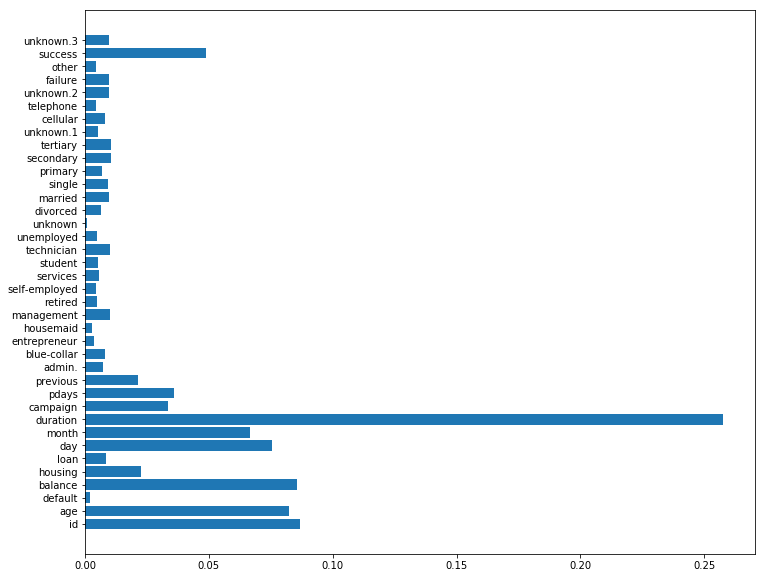

[0.89992628 0.90527092 0.90232215 0.90451613 0.90414747]
train accuracy: 0.914
test accuracy: 0.905


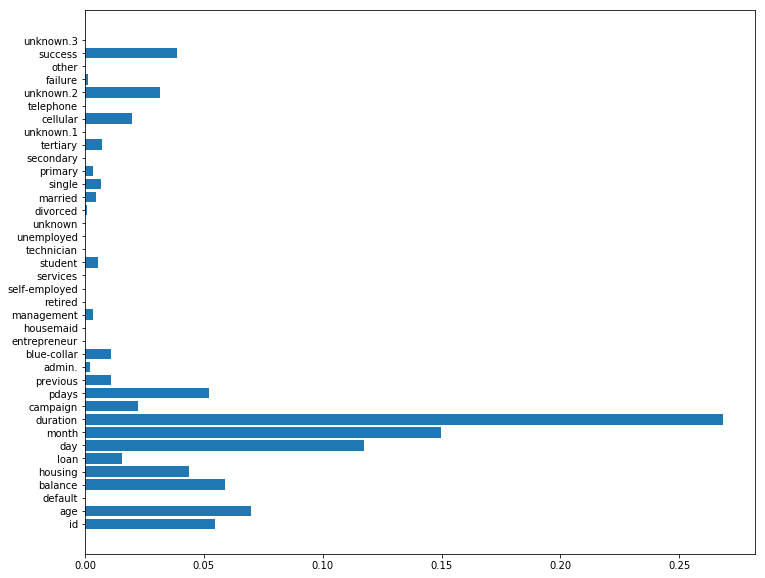

In [10]:
learn("df_dummies.csv")